In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import layers

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

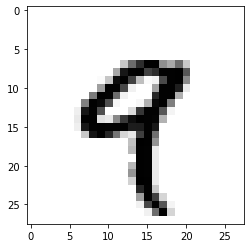

In [4]:
import matplotlib.pyplot as plt 
digit = train_images[4] 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
model = keras.Sequential([
    layers.Dense(784, activation="sigmoid"),
    layers.Dense(16, activation="sigmoid"),
    layers.Dense(16, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [8]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


In [9]:
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 5ms/step - loss: 1.5750 - accuracy: 0.6793
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6541 - accuracy: 0.9079
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3333 - accuracy: 0.9422
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2162 - accuracy: 0.9582
Epoch 5/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1587 - accuracy: 0.9675


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1618 - accuracy: 0.9663


In [11]:
print(f"test_acc:{test_acc}")

test_acc:0.9663000106811523


# Now let's build a CNN 

In [37]:
model_cnn = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3), activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
]) 

In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255


In [40]:
model_cnn.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [41]:
model_cnn.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2049 - accuracy: 0.9364
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9896
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9940


In [42]:
test_loss, test_acc = model_cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9926


In [43]:
print(f"test_acc:{test_acc}")

test_acc:0.9926000237464905


# There are other ways of writing the same model

In [44]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=(3), activation="relu") (inputs)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.Flatten() (x)
outputs = layers.Dense(10, activation="softmax") (x)
model_cnn_2 = keras.Model(inputs=inputs, outputs=outputs)

In [50]:
model_cnn_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 128)         73856 

In [45]:
model_cnn_2.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [46]:
model_cnn_2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2020 - accuracy: 0.9371
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0205 - accuracy: 0.9935


In [47]:
test_loss, test_acc = model_cnn_2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0261 - accuracy: 0.9920


In [48]:
print(f"test_acc:{test_acc}")

test_acc:0.9919999837875366
